In [17]:
# Actividad 4
# Vicente Lavagnino

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

dataset = datasets.make_moons(n_samples=1000, noise=0.05) #usar noice 0.2 para fusionar los clusters
X,_ = dataset

X1 = X
X2 = 2*X
X3 = 3*X

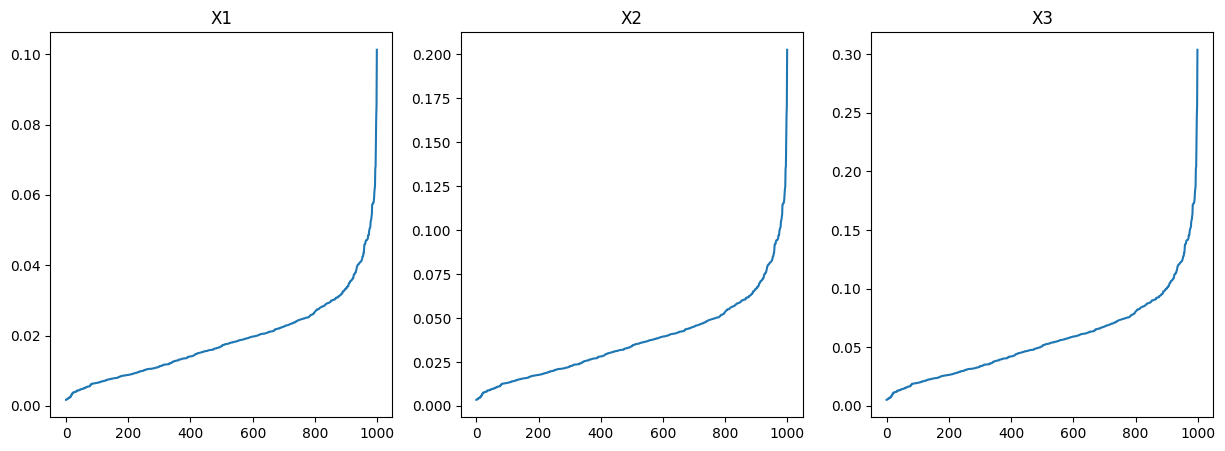

In [18]:
# Dibujar las curvas k dist plots para k=4 con X1, X2 y X3

from sklearn.neighbors import NearestNeighbors

k = 4
nbrs1 = NearestNeighbors(n_neighbors=k).fit(X1)
nbrs2 = NearestNeighbors(n_neighbors=k).fit(X2)
nbrs3 = NearestNeighbors(n_neighbors=k).fit(X3)
distances1, indices1 = nbrs1.kneighbors(X1)
distances2, indices2 = nbrs2.kneighbors(X2)
distances3, indices3 = nbrs3.kneighbors(X3)
distances1 = np.sort(distances1, axis=0)[:,1]
distances2 = np.sort(distances2, axis=0)[:,1]
distances3 = np.sort(distances3, axis=0)[:,1]
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("X1")
plt.plot(distances1)
plt.subplot(132)
plt.title("X2")
plt.plot(distances2)
plt.subplot(133)
plt.title("X3")
plt.plot(distances3)
plt.show()


In [37]:
# Para curva, elegir los hiperparámetros para DBSCAN
from sklearn.cluster import DBSCAN

db1 = DBSCAN(eps=0.04, min_samples=5).fit(X1)
db2 = DBSCAN(eps=0.075, min_samples=5).fit(X2)
db3 = DBSCAN(eps=0.1, min_samples=5).fit(X3)

In [38]:
# Silhouette score
from sklearn.metrics import silhouette_score
silhouette1 = silhouette_score(X1, db1.labels_)
silhouette2 = silhouette_score(X2, db2.labels_)
silhouette3 = silhouette_score(X3, db3.labels_)
print("Silhouette score X1: ", silhouette1)
print("Silhouette score X2: ", silhouette2)
print("Silhouette score X3: ", silhouette3)

Silhouette score X1:  0.10892394553652736
Silhouette score X2:  0.028105062456101018
Silhouette score X3:  -0.12437533932934298


In [45]:
# HDBSCAN con un solo hiperparámetro para X1, X2 y X3
import hdbscan
hdb1 = hdbscan.HDBSCAN(min_cluster_size=2).fit(X1)
hdb2 = hdbscan.HDBSCAN(min_cluster_size=2).fit(X2)
hdb3 = hdbscan.HDBSCAN(min_cluster_size=2).fit(X3)

/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap

In [43]:
# Silhouette score
silhouette1 = silhouette_score(X1, hdb1.labels_)
silhouette2 = silhouette_score(X2, hdb2.labels_)
silhouette3 = silhouette_score(X3, hdb3.labels_)
print("Silhouette score HDBSCAN X1: ", silhouette1)
print("Silhouette score HDBSCAN X2: ", silhouette2)
print("Silhouette score HDBSCAN X3: ", silhouette3)

Silhouette score HDBSCAN X1:  0.33357669590384875
Silhouette score HDBSCAN X2:  0.33357669590384875
Silhouette score HDBSCAN X3:  0.33357669590384875


<Axes: ylabel='distance'>

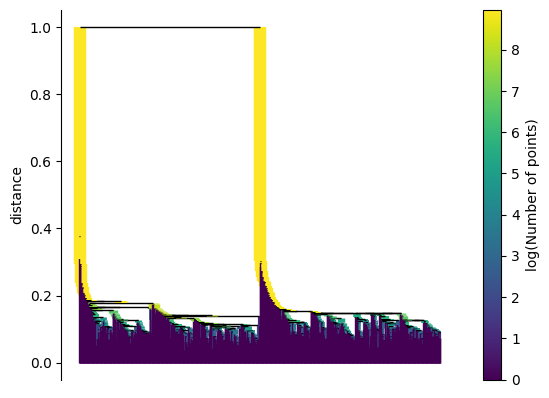

In [44]:
# Dendogramas para X3

clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

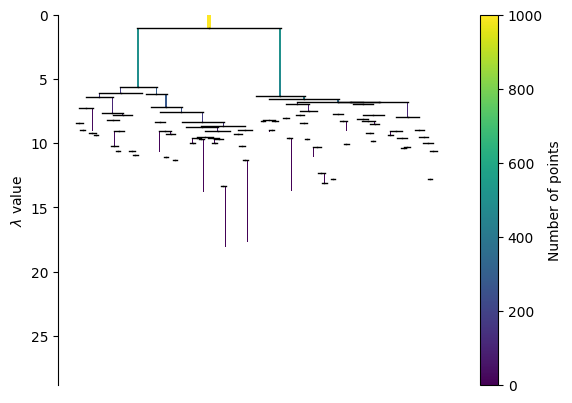

In [33]:
clusterer.condensed_tree_.plot()


<Axes: ylabel='$\\lambda$ value'>

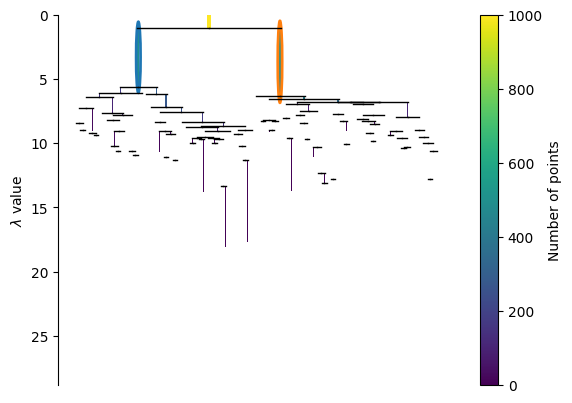

In [34]:
import seaborn as sns

clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())